In [4]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

print("Imports OK")
# Pas besoin de gpu pour exécuter le modèle, juste pour training
print("Number of GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Imports OK
Number of GPUs Available:  1


In [5]:
model = tf.keras.models.load_model("overfit.h5")
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 242, 242, 32)      896       
_________________________________________________________________
activation_38 (Activation)   (None, 242, 242, 32)      0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 119, 119, 64)      18496     
_________________________________________________________________
activation_39 (Activation)   (None, 119, 119, 64)      0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 57, 57, 128)      

In [50]:
import pickle
#loading a test dataframe
with open("testdf.pk",  "rb") as fp:
    df = pickle.load(fp)
    
nameconv = {0: 'AM General', 1: 'Acura', 2: 'Aston', 3: 'Audi', 
             4: 'BMW', 5: 'Bentley', 6: 'Bugatti', 7: 'Buick', 
             8: 'Cadillac', 9: 'Chevrolet', 10: 'Chrysler', 
             11: 'Daewoo', 12: 'Dodge', 13: 'Eagle', 14: 'FIAT', 
             15: 'Ferrari', 16: 'Fisker', 17: 'Ford', 18: 'GMC', 
             19: 'Geo', 20: 'HUMMER', 21: 'Honda', 22: 'Hyundai', 
             23: 'Infiniti', 24: 'Isuzu', 25: 'Jaguar', 26: 'Jeep', 
             27: 'Lamborghini', 28: 'Land', 29: 'Lincoln', 30: 'MINI', 
             31: 'Maybach', 32: 'Mazda', 33: 'McLaren', 34: 'Mercedes-Benz', 
             35: 'Mitsubishi', 36: 'Nissan', 37: 'Plymouth', 38: 'Porsche', 
             39: 'Ram', 40: 'Rolls-Royce', 41: 'Scion', 42: 'Spyker', 
             43: 'Suzuki', 44: 'Tesla', 45: 'Toyota', 46: 'Volkswagen', 
             47: 'Volvo', 48: 'smart'}

numconv = dict(map(reversed, nameconv.items())) 

directory=r"cars_cropped\\"

df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,b_id,fname,cat_str
2,85,109,601,381,91,12,00003.jpg,Dodge
3,621,393,1484,1096,134,22,00004.jpg,Hyundai
12,30,36,418,307,135,22,00013.jpg,Hyundai
13,31,246,778,540,85,12,00014.jpg,Dodge
24,34,87,567,343,194,47,00025.jpg,Volvo


In [9]:
directory=r"cars_cropped/"
directory+df.iloc[667].fname

'cars_cropped/04383.jpg'

1/1 [==============================] - 0s 13ms/step
Predicting :  Ford
Answer :  Ford


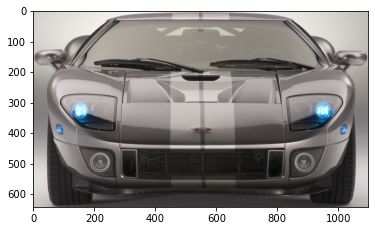

In [93]:
directory=r"cars_cropped/"
batch_size =  1

INDEX_CHOISI = 345

img = plt.imread(directory+df.iloc[INDEX_CHOISI].fname, format='jpeg')
plt.imshow(img)
res = cv2.resize(img, dsize=(244, 244), interpolation=cv2.INTER_AREA)

#adding batch_size to the img array
res = res.reshape((1, 244, 244, 3))

#Predicting
pred = model.predict(res, batch_size=batch_size, verbose=1)

#getting the index with the biggest pred value
indice_pred=np.argmax(pred,axis=1)

print("Predicting : ", nameconv[indice_pred[0]])
print("Answer : ", df.iloc[INDEX_CHOISI].cat_str)

In [78]:
for index, k in enumerate(numconv.keys()):
    print(f"{k} : {pred[0][index]}")

AM General : 0.0
Acura : 0.0
Aston : 0.0
Audi : 0.0
BMW : 0.0
Bentley : 0.0
Bugatti : 0.0
Buick : 0.0
Cadillac : 0.0
Chevrolet : 0.0
Chrysler : 0.0
Daewoo : 0.0
Dodge : 0.0
Eagle : 0.0
FIAT : 0.0
Ferrari : 0.0
Fisker : 0.0
Ford : 1.0
GMC : 0.0
Geo : 0.0
HUMMER : 0.0
Honda : 0.0
Hyundai : 0.0
Infiniti : 0.0
Isuzu : 0.0
Jaguar : 0.0
Jeep : 0.0
Lamborghini : 0.0
Land : 0.0
Lincoln : 0.0
MINI : 0.0
Maybach : 0.0
Mazda : 0.0
McLaren : 0.0
Mercedes-Benz : 0.0
Mitsubishi : 0.0
Nissan : 0.0
Plymouth : 0.0
Porsche : 0.0
Ram : 0.0
Rolls-Royce : 0.0
Scion : 0.0
Spyker : 0.0
Suzuki : 0.0
Tesla : 0.0
Toyota : 0.0
Volkswagen : 0.0
Volvo : 0.0
smart : 0.0
